In [12]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

# Lab 3.03 - Statistical hypothesis testing

## Exercise 1 

The US Navy Recruiting Center knows from the past that recruits' heights are traditionally normally distributed with an average of 69 inches. The recruiting center wants to test whether the average height of this year's recruits exceeds 69 inches. To do this, it takes a random sample of 64 recruits from this year and records their height. The data is in the recruit.csv file.
1. Replace the , by a . in the column Height
2. Formulate the null hypothesis and the alternative hypothesis
3. Calculate the p-value
4. Draw a conclusion based on the previous step and answer the research question.

## Answers

- The p-value is 0.0017%
- There is sufficient reason to reject the H0 hypothesis. The p-value is less than 5%. It is almost impossible that the average height of the recruits would actually be 69 inches with the lengths of this sample.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv', sep=";")
df.head()

,Recruit,Height
0,1,"74,5"
1,2,74
2,3,"74,6"
3,4,"69,8"
4,5,76


   Recruit  Height
0        1    74.5
1        2    74.0
2        3    74.6
3        4    69.8
4        5    76.0
p-value: 0.00002
Null hypothesis rejected
Critical value g ≃ 69.630
sample mean = 70.683 > g = 69.630: reject H0


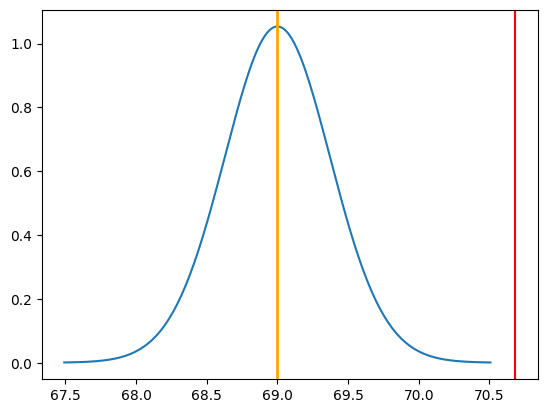

In [39]:
# 1. Replace the , by a . in the column Height
df['Height'] = df['Height'].astype(float)
print(df.head())

# 2. Formulate the null hypothesis and the alternative hypothesis
n = len(df)
sm = df['Height'].mean()
s = df['Height'].std()
a = 0.05
m0 = 69

# 3. Calculate the p-value
p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if p < a:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis accepted")

g = stats.t.isf(a, loc = m0, scale = s / np.sqrt(n), df = n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

# 4. Draw a conclusion based on the previous step and answer the research question.
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc = m0,scale = s/np.sqrt(n), df = n-1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

## Exercise 2

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

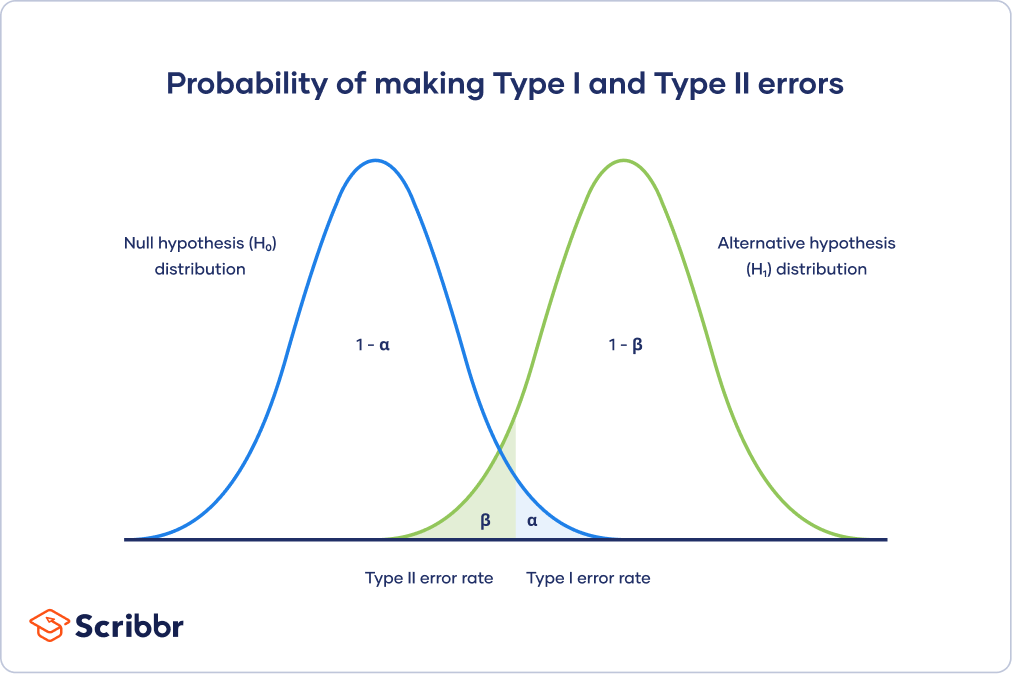


Critical value g ≃ 93.555
sample mean = 20.200 < g = 93.555: do not reject H0


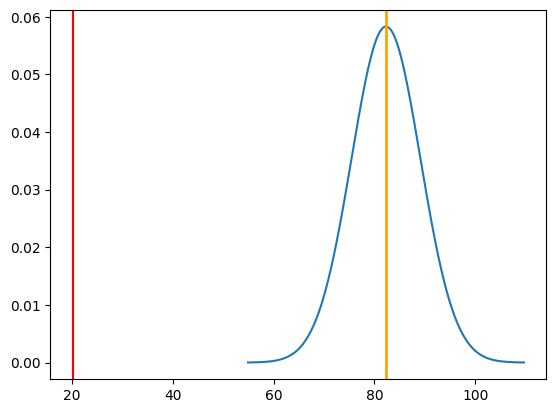

In [61]:
n = 5      # sample size
sm = 20.2  # sample mean
s = 15.3    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 82.3    # hypothetical population mean (H0)

g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))


The chance of a type 1 error equals 0.05.

In [49]:
stats.norm.cdf(g, loc = 105, scale = 15.3 / np.sqrt(n))

0.047192073697960024



## Answers

1. Region of rejection: rainfall >= 93.555
2. Because the normal distribution is continuous, the probability of a Type I error for a 5% test is always 5%.
3. If X $\sim$ Nor(105, 15.3) => P($\bar{X}$ < 93.6) = 0.048

## Exercise 3

In the past, the time, in minutes for a particular minor medical procedure has been found to have mean 34.2 minutes and standard deviation 2.6. A new method is being considered in the hope that the average time would be shorter. A random sample of 50 procedures using the new method is taken and the mean time is found to be 33.5 minutes.  
Carry out a test at the 5% level of significance to see whether the mean time for the procedure has decreased.

## Answers
- p-value: 0.02847 => p < a: reject H0
- Critical value g ≃ 33.595 => sample mean = 33.500 < g = 33.595: reject H0

p-value: 0.02847
p < a: reject H0
Critical value g ≃ 33.595
sample mean = 33.500 < g = 33.595: reject H0


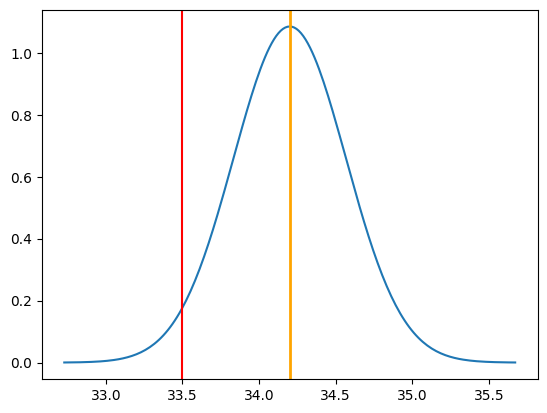

In [60]:
n = 50
sm = 33.5
s = 2.6
a = 0.05
m0 = 34.2

# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

g = stats.norm.isf(1-a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

### Exercise 4

A certain variety of bush grows to heights which are normally distributed with mean 74.0 cm. A new fertiliser is introduced in the hope that this will increase the heights. The nursery owner records the heights of a large random sample of _n_ bushes, and calculates that $\bar{x} = 75.2$ and $s = 5.3$.  
1. She consults a friend who is a statistician as to whether or not there is evidence that the heights have increased. The friend calculates the test statistic, $z$, has a value of 1.867. Calculate the value of $n$.
2. Using this value of the test statistic, carry out the test at the 5% level of significance. 


In [66]:
sm = 75.2
s = 5.3
a = 0.05
m0 = 74.0
z = 1.867

n = round((s * z / (sm - m0)) ** 2, 0)

print("n = %.3f" % n)

n = 68.000


In [67]:
g = stats.norm.isf(a, loc=m0, scale=s / np.sqrt(n)) #
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 75.057
sample mean = 75.200 > g = 75.057: reject H0


In [70]:
p = stats.norm.sf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.03095
p < a: reject H0



## Answers
1. $z = {{\bar{x} - \mu}\over{{s}\over{\sqrt{n}}}}$ => n = 68
2. p-value: 0.03095 => p < a: reject H0  
Critical value g ≃ 75.057   
sample mean = 75.200 > g = 75.057: reject H0